In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import sys

sys.path.append("/home/Brandon/Documents/feedback_helper_functions/")
from transfer import *
import filters as fl

a = 0.3764210592453014, b = 1.068500263848051
$\frac{1}{1.0s^2 + 0.6955354244859049s + 0.2881394232500809}$ k = 1
$\frac{1}{1.0s^2 + 0.2881002059329895s + 0.9952462044366284}$ k = 1
$\frac{1}{1.0s^4 + 0.9836356304188945s^3 + 1.483769526714788s^2 + 0.7752420184465771s + 0.2867696673382022}$ k = 1


(np.float64(0.1), np.float64(10.0), np.float64(0.0), np.float64(4.0))

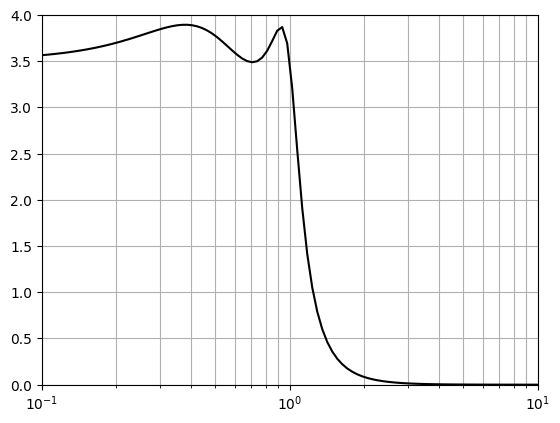

In [12]:
n = 4
a, b = fl.find_chebyshev_ab(n, .9)
itier = int(ceil(n)/2)
print(f"a = {a}, b = {b}")
offset_start = 180/(2*n)
frac_arr = frac([1], [1])
for i in range(itier):
    cur_fraca = frac([1], [1, (a*np.cos(np.deg2rad(offset_start + i*(180/n))) + 1j*b*np.sin(np.deg2rad(offset_start + i*(180/n))))])
    cur_fracb = frac([1], [1, (a*np.cos(np.deg2rad(offset_start + i*(180/n))) - 1j*b*np.sin(np.deg2rad(offset_start + i*(180/n))))])
    cur_frac = convolve_equations(cur_fraca, cur_fracb)
    cur_frac.apply_function(lambda x : np.real(x))
    frac_arr = convolve_equations(frac_arr, cur_frac)
    print(cur_frac.print())

den = np.convolve([1, .694, .286], [1, .2881, .995])
num = [1]
print(frac_arr.print())

test_case = frac(num, den)
system = sig.lti(num,den)
w, Hmag, Hphase = sig.bode(system)
w, hmag, pmag = make_bode(test_case, bode_start=.1, bode_stop=10, dt=.01, define_w=False)

plt.semilogx(w, db_to_amp(Hmag), 'k')
plt.grid(which='both')
plt.axis([0.1, 10, 0, 4])
